In [25]:
%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

In [3]:
ts = GaitTimeSeries.load_data('../tests/data/cloudupdrs_gait.csv')
gp = GaitProcessor()

### Freeze of gait exampe

In [4]:
freeze_time, freeze_index, locomotor_freeze_index = gp.freeze_of_gait(ts)
rts = gp.resample_signal(ts)

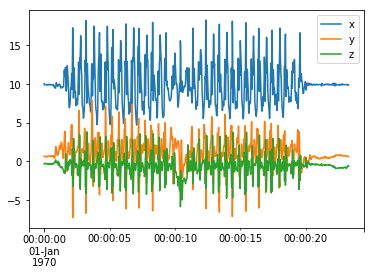

In [5]:
rts[['x', 'y', 'z']].plot()

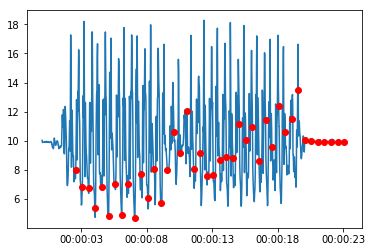

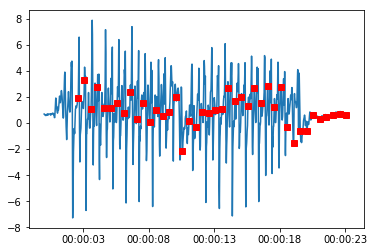

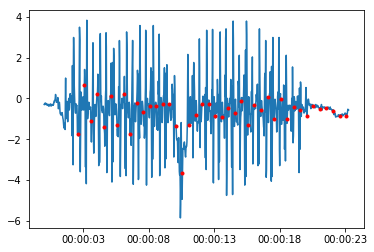

In [6]:
for c, col in zip(['ro', 'rs', 'r.'], ['x', 'y', 'z']):
    plt.plot(rts[col])
    plt.plot(rts[col][freeze_time], c)
    plt.show()

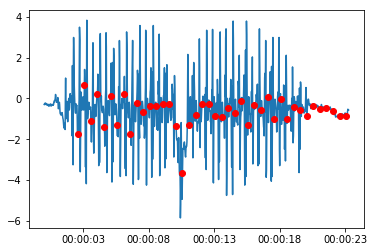

In [7]:
plt.plot(rts.z)
plt.plot(rts.z[freeze_time], 'ro')

### Frequency of peaks example [Hz]

In [8]:
frequency_of_peaks = gp.frequency_of_peaks(ts, axis='x')

In [10]:
frequency_of_peaks

-192.72632494759722

### Speed of gait example [m/s]

In [12]:
speed_of_gait = gp.speed_of_gait(ts, wavelet_type='db3', wavelet_level=6)
speed_of_gait

1.4426881267136054

### Walk regularity / symmetry example

In [13]:
step_regularity, stride_regularity, walk_symmetry = gp.walk_regularity_symmetry(ts)

In [20]:
step_regularity

[0.4493569523799591, 0.277063950620853, 0.4287390951050497]

In [21]:
stride_regularity

[0.7254362682106995, 0.6405084342818693, 0.3355752604079603]

In [22]:
walk_symmetry

[0.2760793158307404, 0.36344448366101634, -0.09316383469708939]

### Local walk (not cardinal) direction example.

In [23]:
direction = gp.walk_direction_preheel(ts)

In [26]:
direction

array([-0.97766317, -0.16314679,  0.13250603])

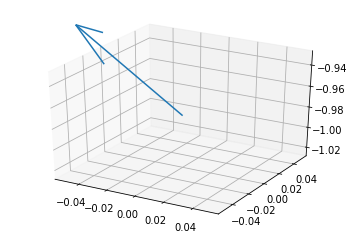

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver( *[0, 0] + list(direction) + [0])